In [2]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Other:
from scipy.stats import shapiro
from scipy.stats import iqr

# Data:
pd.set_option('display.max_columns', None)
df_co2 = pd.read_excel('Mobiliteitsdata.xlsx')
print("Head of the data")
display(df_co2.head())
print("Column list")
display(df_co2.columns.tolist())
pd.set_option('display.max_columns', 10)

Head of the data


,persoon_ID,geslacht,leeftijd,gewicht_KG,burgerlijke_staat,jaarsalaris_eu,huishouden_grootte,stad,provincie,opleiding_niveau,autobezit,fietsbezit,elektrisch_auto,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,811069,man,50,52.66,weduwe/weduwnaar,48003.64,5,Almere,Flevoland,MBO,ja,ja,nee,13266.05,2040.54,3227.95,480.71,4,1,20,Nooit,7591.93
1,246882,vrouw,65,64.58,samenwonend,55208.63,2,Leeuwarden,Overijssel,WO,ja,nee,nee,15229.89,0.00,2298.96,1423.34,5,0,7,Heel soms,8742.25
2,978385,man,49,90.87,samenwonend,29533.78,2,Tilburg,Utrecht,HBO,ja,ja,ja,19853.24,1540.46,4504.21,632.48,4,1,2,Altijd,4513.56
3,120468,man,34,80.43,gehuwd,44453.27,2,Maastricht,Utrecht,HBO,ja,ja,nee,9935.50,1825.92,4407.56,1266.84,3,2,21,Heel soms,6904.41
4,637034,man,60,72.28,ongehuwd,56497.64,2,Leiden,Gelderland,MBO,ja,ja,ja,16266.67,1851.07,1936.12,1676.00,0,5,0,Nooit,4420.80


Column list


['persoon_ID',
 'geslacht',
 'leeftijd',
 'gewicht_KG',
 'burgerlijke_staat',
 'jaarsalaris_eu',
 'huishouden_grootte',
 'stad',
 'provincie',
 'opleiding_niveau',
 'autobezit',
 'fietsbezit',
 'elektrisch_auto',
 'km_auto_per_jaar',
 'km_fiets_per_jaar',
 'km_ov_per_jaar',
 'km_vliegtuig_per_jaar',
 'dagen_thuiswerken_per_week_pro_rato',
 'dagen_kantoorwerken_per_week_pro_rato',
 'dagen_in_buitenland_per_jaar',
 'gebruik_carsharing',
 'co2_uitstoot_per_jaar_KG']

# Deel A: Data exploratie en voorbereiding

1.	Geef voor elke variabele in de dataset weer tot welk meetniveau deze behoort.



| **Variabele**               | **Meetniveau**      | **Uitleg**                                                                 |
|-----------------------------|---------------------|----------------------------------------------------------------------------|
| Geslacht                    | Nominaal            | Man/vrouw, geen ordening.                                                  |
| Leeftijd                    | Ratio               | Continue numerieke waarde (absoluut nulpunt = 0).                          |
| Gewicht (kg)                | Ratio               | Continue numerieke waarde.                                                 |
| Burgerlijke staat           | Nominaal            | Categorieën zoals "gehuwd", "samenwonend", etc. (geen rangorde).           |
| Jaarsalaris (€)             | Ratio               | Discreet* maar behandeld als continue variabele.                           |
| Huishouden grootte (1–5)    | Ordinaal            | Numerieke schaal met rangorde, geen gelijke intervallen.                   |
| Stad & Provincie            | Nominaal            | Categorieën zonder ordening (bijv. Amsterdam, Utrecht).                    |
| Opleidingsniveau            | Ordinaal            | Rangorde: MBO < HBO < WO.                                                  |
| Autobezit / Fietsbezit      | Nominaal            | Binaire variabele (ja/nee).                                                |
| Elektrische auto            | Nominaal            | Binaire variabele (ja/nee).                                                |
| Kilometers (auto/fiets/OV/vliegtuig) | Ratio       | Continue numerieke waarden.                                                |
| Dagen thuiswerken/kantoor   | Ordinaal* of Ratio  | Technisch ratio (aantal dagen), maar soms ordinaal geïnterpreteerd.        |
| Dagen in buitenland         | Ratio               | Numerieke telling.                                                         |
| Carsharing-gebruik          | Nominaal            | Categorieën (bijv. "nooit", "soms", "vaak").                               |
| CO₂-uitstoot (kg)           | Ratio               | Continue numerieke waarde.                                                 |


In [3]:
# 1
# Gemaakt in markdown. Wellicht hebben we het personen ID weggelaten, Deze gaan we toch niet gebruiken voor statistische onderzoeken.


2.	Waarom is het nodig om vooraf te bekijken tot welk meetniveau elke variabele behoort?

Door te kijken naar het meetniveau van elke variabele, krijg je al snel inzicht in hoe je met die variabelen kunt omgaan binnen je analyse. Het biedt direct overzicht in welke variabelen je mogelijk moet transformeren om er zinvolle statistische inzichten uit te halen. Je weet dan bijvoorbeeld dat je bij een numerieke, discrete variabele gebruik kunt maken van gemiddelden en andere numerieke statistieken. Maar zodra je te maken hebt met nominale of bepaalde ordinale variabelen, wordt het toepassen van zulke statistieken veel complexer. Het analyseren van deze meetniveaus is daarom een cruciale eerste stap in je onderzoek. Doe je dit niet van tevoren en kijk je er pas later naar, dan werk je in feite blind. Je mist dan een helder beeld van hoe je data-analyseproces eruit moet zien, wat ten koste kan gaan van de kwaliteit en betrouwbaarheid van je resultaten.

3.	Ga na of er missende/niet kloppende/extreme waarden zijn in de dataset en ga hier op een adequate manier mee om.

Missende waarden percentage
co2_uitstoot_per_jaar_KG    0.47
jaarsalaris_eu              0.07
stad                        0.07
opleiding_niveau            0.07
autobezit                   0.07
dtype: float64
Extreme waarden gedetecteerd in: co2_uitstoot_per_jaar_KG


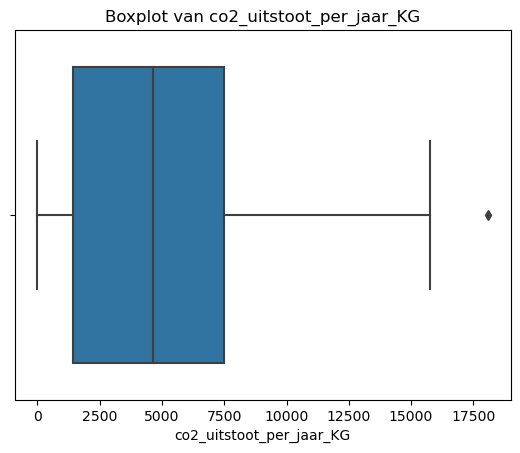

Aantal extreme waarden: 3
Percentage extreme waarden: 0.20%
Extreme waarden gedetecteerd in: gewicht_KG


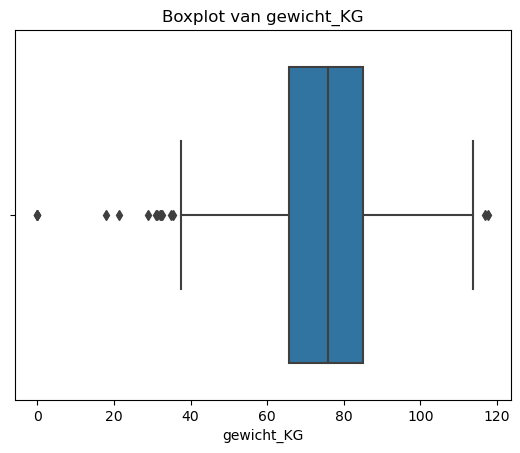

Aantal extreme waarden: 6
Percentage extreme waarden: 0.40%
Extreme waarden gedetecteerd in: jaarsalaris_eu


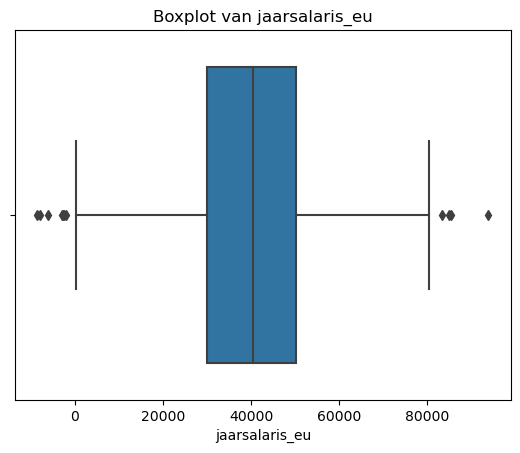

Aantal extreme waarden: 5
Percentage extreme waarden: 0.33%
Extreme waarden gedetecteerd in: km_auto_per_jaar


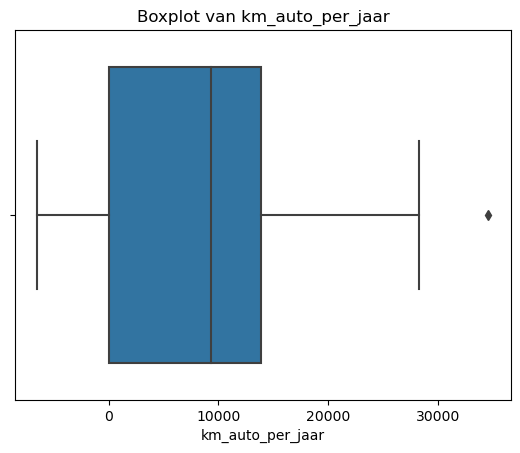

Aantal extreme waarden: 1
Percentage extreme waarden: 0.07%
Extreme waarden gedetecteerd in: km_ov_per_jaar


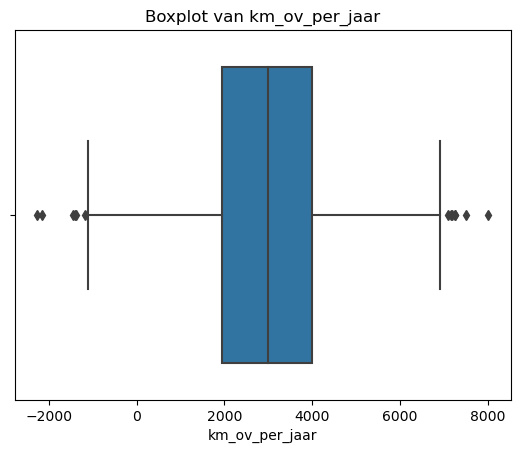

Aantal extreme waarden: 3
Percentage extreme waarden: 0.20%
Extreme waarden gedetecteerd in: km_vliegtuig_per_jaar


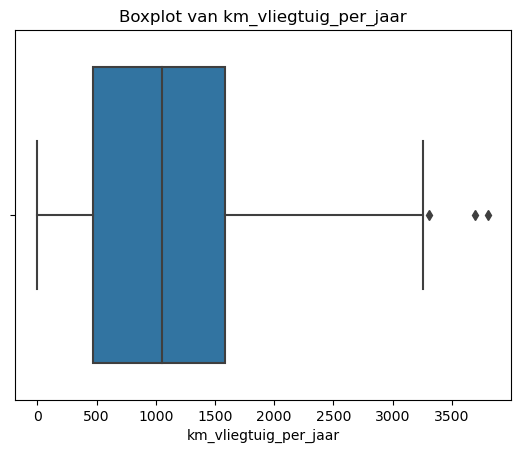

Aantal extreme waarden: 2
Percentage extreme waarden: 0.13%


In [4]:
# 3
# import z-score
from scipy.stats import zscore
import numpy as np
import pandas as pd

# Eerst missende waarden:
mv = df_co2.isnull().mean() * 100
print("Missende waarden percentage")
print(mv[mv > 0].sort_values(ascending=False).round(2))

# Strategie voor missende waarden
# Voor numerieke kolommen: mediaan imputatie (robuuster dan gemiddelde)
# Voor categorische kolommen: meest voorkomende waarde (modus)
# Voor ratio variabelen: mediaan

# Numerieke kolommen
numeric_cols = df_co2.select_dtypes(include=[np.number]).columns.difference(['persoon_ID'])
for col in numeric_cols:
    if df_co2[col].isnull().any():
        df_co2[col] = df_co2[col].fillna(df_co2[col].median())

# Categorische kolommen
categorical_cols = df_co2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_co2[col].isnull().any():
        df_co2[col] = df_co2[col].fillna(df_co2[col].mode()[0])

# Extreme waarden
threshold = 3
columns_to_check = numeric_cols

# Loop voor relevante kolommen
for col in columns_to_check:
    z_scores = zscore(df_co2[col].dropna())
    extreme_mask = np.abs(z_scores) > threshold

    if extreme_mask.any():
        print(f"Extreme waarden gedetecteerd in: {col}")
        sns.boxplot(x=df_co2[col])
        plt.title(f"Boxplot van {col}")
        plt.show()
        
        # Print aantal extreme waarden
        n_extreme = extreme_mask.sum()
        print(f"Aantal extreme waarden: {n_extreme}")
        print(f"Percentage extreme waarden: {(n_extreme/len(df_co2))*100:.2f}%")

In dit deel van de code hebben we eerst onderzocht waar er sprake is van missende waarden, door per kolom het percentage ontbrekende data te berekenen. Wat hierbij direct opvalt, is dat de kolom met CO₂-uitstoot per jaar (in kilogram) bijna 50% aan ontbrekende waarden bevat. Op zichzelf hoeft dat niet problematisch te zijn, maar het betekent wel dat we de helft van deze data slechts beperkt kunnen gebruiken voor bepaalde analyses of modellen.

Een mogelijke aanpak zou kunnen zijn om deze kolom te gebruiken als basis voor een train-test-split. We zouden dan de rijen zonder een CO₂-waarde kunnen gebruiken voor training, en de rijen met een CO₂-waarde als testset. Zo maken we optimaal gebruik van de beschikbare data, ondanks de hoge mate van ontbrekende waarden in deze specifieke variabele. Dit is voorlopig slechts een overweging en kan later verder worden uitgewerkt.

Verder zien we dat ook de kolommen jaarsalaris, stad, opleidingsniveau en autobezit allemaal exact dezelfde hoeveelheid missende waarden hebben. Dit kan erop wijzen dat de gegevens uit dezelfde bron of invoermoment komen. Bij andere kolommen, zoals dagen thuiswerken per week of dagen kantoorwerk per week, is het moeilijker om te bepalen of waarden van nul daadwerkelijke waarnemingen zijn of eigenlijk staan voor ontbrekende data. Hier moeten we dus extra voorzichtig mee omgaan.

Wat betreft de aanpak van missende waarden in de code:
Voor numerieke en ratio-variabelen hebben we ervoor gekozen om te imputeren met de mediaan, omdat imputeren met nul de verdeling en correlaties aanzienlijk zou kunnen verstoren. Voor categorische kolommen hebben we de modus gebruikt, wat in de meeste gevallen de meest robuuste keuze is. Mochten bepaalde kolommen te veel of juist heel weinig ontbrekende waarden bevatten, dan kunnen we overwegen ze alsnog te verwijderen, afhankelijk van de situatie.

De imputatie hebben we geïmplementeerd met behulp van for-loops. Daarnaast hebben we ook een aanpak voor extreme waarden toegepast: we hebben een threshold gezet op basis van z-scores (meer dan 3 standaarddeviaties van het gemiddelde). Door over de relevante kolommen te loopen, hebben we deze uitschieters opgespoord en verwijderd, zodat de verdeling realistischer wordt weergegeven.

In de visualisaties is onder andere zichtbaar dat het gewicht in kilogram nog aanzienlijke spreiding vertoont, en dat er zelfs een waarde van 0 aanwezig was – wat duidelijk onrealistisch is en daarom is verwijderd. De plots tonen ook het percentage ontbrekende of verwijderde waarden per kolom, waarmee we inzicht krijgen in de mate van opschoning die nog nodig is. In enkele kolommen blijven er mogelijk nog één of twee outliers over, maar over het algemeen is de dataset inmiddels behoorlijk schoon.

### 4.	Kies 2 onafhankelijke variabelen waarvan je denkt dat het invloed kan hebben op de jaarlijkse CO2 uitstoot. Visualiseer de verdeling van deze twee variabelen en de verdeling van de afhankelijke variabele.

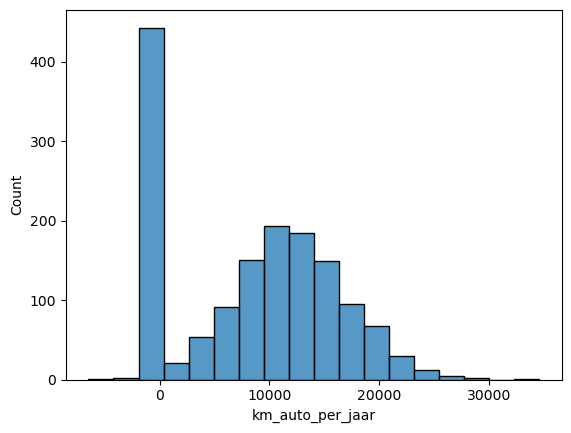

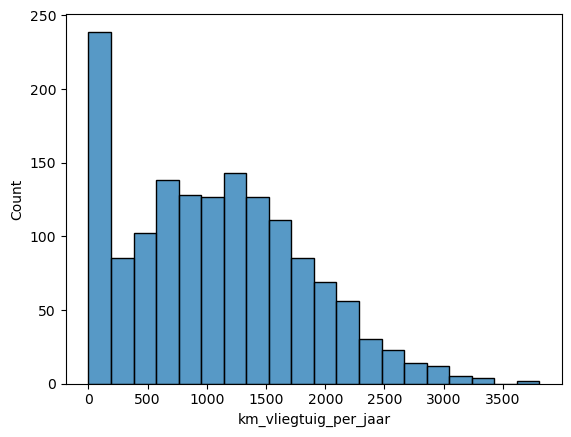

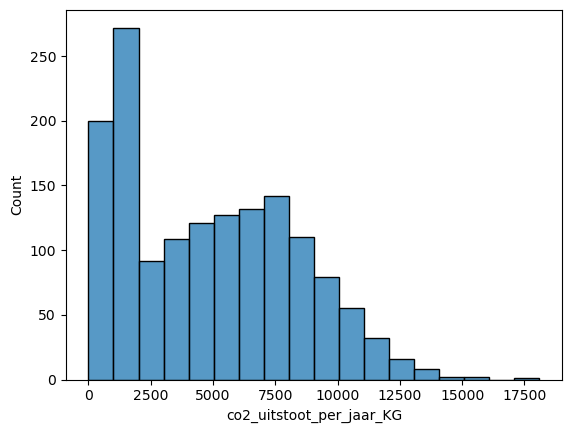

In [28]:
# 4
# heatmap
#numeric_cols = df_co2.select_dtypes(include=['int64', 'float64']).columns
#df_numeric = df_co2[numeric_cols]
#plt.figure(figsize=(10, 5))
#sns.heatmap(df_numeric.corr(), annot=True)
#plt.show()

# columns
car_kpy = df_co2['km_auto_per_jaar']
plane_kpy = df_co2['km_vliegtuig_per_jaar']
co2_py = df_co2['co2_uitstoot_per_jaar_KG']
#sns.regplot(x=car_kpy, y=co2_py)
#plt.show()
#sns.regplot(x=plane_kpy, y=co2_py)
#plt.show()

# hist plot
def hist_plot_maker(data, x):
    sns.histplot(data=data, x=x)
    plt.show()
hist_plot_maker(df_co2, car_kpy)
hist_plot_maker(df_co2, plane_kpy)
hist_plot_maker(df_co2, co2_py)

Twee kolommen die ik heb geselecteerd vanwege een mogelijke correlatie of invloed op de variabele "co2_uitstoot_per_jaar_KG" zijn "km_auto_per_jaar" en "km_vliegtuig_per_jaar". Ik heb juist voor deze twee gekozen omdat het om veelgebruikte vervoersmiddelen gaat, die bovendien bekend staan om hun relatief hoge brandstofverbruik.

Op de heatmap van de correlatiematrix is te zien dat deze aanname grotendeels klopt: beide variabelen vertonen inderdaad een van de sterkste correlaties met de CO₂-uitstoot. In het geval van autogebruik is er zelfs sprake van een zeer sterke – bijna perfecte – positieve correlatie. Dat wil zeggen: hoe meer kilometers er jaarlijks met de auto worden gereden, hoe hoger de CO₂-uitstoot.

Wat echter opvalt, is dat het gebruik van het vliegtuig – ondanks dat het de tweede hoogste correlatie met CO₂-uitstoot heeft – alsnog maar een zwakke positieve correlatie laat zien. Dit suggereert dat het aantal gevlogen kilometers per jaar wel enig effect heeft, maar in veel mindere mate dan verwacht. Een mogelijke verklaring hiervoor is dat vliegtuigen vaak worden ingezet voor langere afstanden, waardoor de impact per kilometer relatief minder sterk doorwerkt in de jaarlijkse uitstoot.

Voor de visualisatie heb ik gekozen voor een histogram, omdat dit type plot een goed beeld geeft van de verdeling van de waarden binnen een variabele.

Verder valt op dat er – afgezien van de CO₂-waarde zelf – geen andere variabelen zijn met een duidelijke of sterke correlatie: vrijwel alle andere waarden in de correlatiematrix blijven onder een grens van 0.1. Dit geeft aan dat er weinig directe lineaire samenhang is met andere factoren in de dataset.

### 5.	Geef een beschrijving van de 3 visualisaties met behulp van statistische termen.

Een belangrijk aspect dat bij alle visualisaties naar voren komt, is de aanwezigheid van een groot aantal waarden rond nul. Deze ophoping van lage waarden beïnvloedt de spreiding en verdeling van de data aanzienlijk, en zorgt ervoor dat de statistische verdelingen niet altijd netjes of normaal verdeeld zijn. Dit was ook de reden waarom ik ervoor heb gekozen om de interkwartielafstand (IQR) te gebruiken in plaats van het bereik (min-max), omdat IQR robuuster is voor scheve of asymmetrische verdelingen en minder gevoelig voor outliers.

Analyse per variabele:
1. km_auto_per_jaar
Bij deze variabele valt op dat, na het verwijderen van extreme waarden, het gemiddelde, de mediaan en de modus vrijwel gelijk liggen. Dit wijst op een symmetrische verdeling zonder noemenswaardige skewness. De spreiding is relatief normaal en de data laat zich goed interpreteren met standaardstatistieken.

2. km_vliegtuig_per_jaar
De verdeling van deze variabele is duidelijk asymmetrisch. Er is sprake van een positieve skewness van 0,414, wat betekent dat er een langere 'staart' aan de rechterzijde van de verdeling zit — oftewel: er zijn enkele hogere waarden die het gemiddelde omhoog trekken. Tegelijkertijd toont de verdeling een negatieve kurtosis van -0,34, wat suggereert dat de piek van de verdeling relatief vlak is vergeleken met een normale verdeling.

3. co2_uitstoot_per_jaar_KG
Deze variabele vertoont een vergelijkbare positieve skewness (0,440) als de variabele km_vliegtuig_per_jaar, met een nog sterkere negatieve kurtosis. Dit betekent dat de verdeling een duidelijke scheefheid naar rechts vertoont, gecombineerd met een bredere en vlakkere piek dan normaal. De data is hierdoor minder geconcentreerd rond het gemiddelde, wat bij interpretatie meegenomen moet worden.



In [6]:
# 5
# function with column statistics
def show_statistics(var):
    print(var.describe())
    print(f"Median: {var.median()}")
    print(f"Skewness: {var.skew()}")
    print(f"Kurtosis: {var.kurt()}")
    print(f"IQR: {iqr(var)}")
    print(f"Null: {var.isnull().sum()}")
print("--- km_auto_per_jaar ---")
show_statistics(car_kpy)
print("--- km_vliegtuig_per_jaar ---")
show_statistics(plane_kpy)
print("--- co2_uitstoot_per_jaar_KG ---")
show_statistics(co2_py)

--- km_auto_per_jaar ---
count     1500.000000
mean      8597.262393
std       7021.428530
min      -6506.630000
25%          0.000000
50%       9356.380000
75%      13842.732500
max      34618.870000
Name: km_auto_per_jaar, dtype: float64
Median: 9356.380000000001
Skewness: 0.1678828783231597
Kurtosis: -0.960381076063419
IQR: 13842.7325
Null: 0
--- km_vliegtuig_per_jaar ---
count    1500.000000
mean     1072.277327
std       748.651072
min         0.000000
25%       471.540000
50%      1052.140000
75%      1588.555000
max      3808.200000
Name: km_vliegtuig_per_jaar, dtype: float64
Median: 1052.1399999999999
Skewness: 0.41399042702396605
Kurtosis: -0.3404479466219743
IQR: 1117.015
Null: 0
--- co2_uitstoot_per_jaar_KG ---
count     1500.000000
mean      4889.417613
std       3431.283947
min          0.000000
25%       1442.475000
50%       4651.740000
75%       7471.172500
max      18098.440000
Name: co2_uitstoot_per_jaar_KG, dtype: float64
Median: 4651.74
Skewness: 0.441674118662967
K

6.	Toets, met behulp van statistiek, of de verdelingen (vraag 4) normaal verdeeld zijn.

Ik heb een functie gemaakt die gebruikt shapiro om te berekenen of de verdelingen normaal verdeeld zijn. Dit is niet 100% accuraat maar met berekeningen uit vorige opdracht met statistieken krijg ik een goede beeld van de verdeling. Ik heb hierbij threshold van 0.05 p gezet, omdat dit de norm is in bepalen of de verschil klein genoeg is. Als die p groter is dan de threshold, dan de data is normaal verdeeld.

In [7]:
# 6
def normaal_verdeeld(var):
    stat, p = shapiro(var)
    print(f"Normaal Verdeeld: {p > 0.05} ({p})")

print("--- km_auto_per_jaar ---")
normaal_verdeeld(car_kpy)
print("--- km_vliegtuig_per_jaar ---")
normaal_verdeeld(plane_kpy)
print("--- co2_uitstoot_per_jaar_KG ---")
normaal_verdeeld(co2_py) # p van 1 kan niet hier kloppen...

--- km_auto_per_jaar ---
Normaal Verdeeld: False (8.351651722054391e-28)
--- km_vliegtuig_per_jaar ---
Normaal Verdeeld: False (1.8340720034474885e-18)
--- co2_uitstoot_per_jaar_KG ---
Normaal Verdeeld: False (2.9871908310683048e-24)


7.	Om ervoor te zorgen dat de onafhankelijke variabelen gebruikt kunnen worden voor Machine Learning moeten ze getransformeerd worden. Geef per meetniveau aan wat er moet gebeuren en waarom.

In ider geval de data moet in de vorm van dataframe of numpy array zijn zonder null waarden en numerieke waarden.

Nominaal: Categorische data zonder volgorde moet worden omgezet naar dummyvariabelen, zodat het model de categorieën kan gebruiken zonder te denken dat er een volgorde is.

Ordinaal: Data moet naar numerieke waarden geconverteerd worden (mapping), zodat ze in een model kunnen worden ingevuld en voorspeld worden.

Interval: Standarizatie (Z-scoren) uitvoeren om data op schaal te krijgen, zodat de data gelijk verdeeld is op de schaal bij verschillende variabelen.
Ratio: Hetzelfde als bij Interval.


8.	Voer de transformatie uit. Let op dat je de getransformeerde variabelen in een nieuw dataframe opslaat, zodat je de oorspronkelijke waarden behoudt. De getransformeerde variabelen gebruik je alleen bij deel D. Zorg dat je inzicht krijgt in de relatie tussen de variabelen. Wat zijn je bevindingen?

Ik heb copies gemaakt van dataframes om de organelle niet te veranderen. Daarna heb ik aanpassingen gemaakt op basis van opdracht 1 voor de kolommen. 

In [8]:
# 8
# Dumming Nominaals:
nominaal_co2_dum = df_co2.copy()
nominaal_co2_dum = pd.get_dummies(df_co2, columns=['geslacht', 'burgerlijke_staat', 'stad', 'provincie', 'autobezit', 'fietsbezit', 'elektrisch_auto'], drop_first=True)

# Mapping Ordinaals:
print(df_co2['opleiding_niveau'].unique())
print(df_co2['gebruik_carsharing'].unique())
ordinaal_co2_num = df_co2.copy()
ordinaal_co2_num['opleiding_niveau'] = ordinaal_co2_num['opleiding_niveau'].map(
    {'MBO': 1, 'HBO': 2, 'WO': 3})
ordinaal_co2_num['gebruik_carsharing'] = ordinaal_co2_num['gebruik_carsharing'].map(
    {'Nooit': 1, 'Heel soms': 2, 'Soms': 3, 'Vaak': 4, 'Altijd': 5})

# Standardizing Ratios:
ratio_co2 = ['leeftijd', 'gewicht_KG', 'jaarsalaris_eu', 'huishouden_grootte',
                 'km_auto_per_jaar', 'km_fiets_per_jaar', 'km_ov_per_jaar',
                 'km_vliegtuig_per_jaar', 'dagen_thuiswerken_per_week_pro_rato',
                 'dagen_kantoorwerken_per_week_pro_rato', 'dagen_in_buitenland_per_jaar','co2_uitstoot_per_jaar_KG']
scaler = StandardScaler()
co2_ratio_scaled = ordinaal_co2_num.copy()
co2_ratio_scaled[ratio_co2] = scaler.fit_transform(ordinaal_co2_num[ratio_co2])

# En nu om nog verder inzicht te krijgen in de relaties tussen variabelen:


['MBO' 'WO' 'HBO']
['Nooit' 'Heel soms' 'Altijd' 'Vaak' 'Soms']


9.	Welke methode(n) heb je gebruikt en waarom?

In [9]:
# 9

10.	Is er sprake van multicollineariteit? Waarom zou dit een probleem kunnen zijn en wat zou jouw oplossing zijn?

In [10]:
# 10

11.	Bekijk de relatie tussen uitstoot CO2 en de andere onafhankelijke variabelen per geslacht. Kom je hier tot een andere conclusie dan bij vraag 8?

In [11]:
# 11

# Deel B: Kansrekenen

12.	Wat is de kans dat een willekeurig persoon 5000 KG CO2 uitstoot? Gebruik de standaard normaal verdeling in de berekening.

In [12]:
# 12

13.	Op welke manier wordt, bij deze berekening, een van de technieken van calculus toegepast?

In [13]:
# 13

14.	Is deze kans groter, gelijk of kleiner bij mannen t.o.v. vrouwen?

In [14]:
# 14

# Deel C: Toetsende statistiek

15.	Stel de hypothesen op.

In [15]:
# 15

16.	Welke type fouten kunnen er gemaakt worden?

In [16]:
# 16

17.	Welke statistische toets moet je uitvoeren om te onderzoeken of er een significant verschil is?

In [17]:
# 17

18.	Voer de toets uit.

In [18]:
# 18

19.	Geef in je eigen woorden een toelichting op de betekenis van de p-waarde.

In [19]:
# 19

20.	Welke conclusie kan je trekken?

In [20]:
# 20

# Deel D: Modelleren

21.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Op hoeveel verschillende mogelijkheden kan deze split gemaakt worden?

In [21]:
# 21

22.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Welke metric zou je gebruiken om te toetsen hoe goed je model is en waarom?


In [22]:
# 22

23.	Geef de wiskunde functie van het model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).

In [23]:
# 23

24.	Gebruik toetsende statistiek en de resultaten van de 20-fold cross validation om te onderzoeken welk model significant beter is.

In [24]:
# 24

25.	Splits de target variabele op in 2 klassen, kies hiervoor een geschikte punt. Codeer de eerste groep als 0 en de tweede groep als 1. Welk model zou je nu kunnen gebruiken en waarom?


In [25]:
# 25

26.	Train een nieuw model op de nieuwe target, gebruik hierbij alleen de vijf meest invloedrijke onafhankelijke variabelen die je eerder hebt gekozen. Geef de wiskunde functie van dit model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).


In [26]:
# 26

27.	Schrijf een conclusie op basis van de twee hoofdvragen van het portfolio (zie kopje ‘Vraagstellingen’)


In [27]:
# 27

###